### RQ5: How have creators evolved community management from informal interactions to professional engagement strategies, and what video styles are generating the most engagement?

The goal is to help content creators generate reactions from their community and leverage the right themes to keep their community active. This will be done in two steps : 
- Identifying which categories are correlated among the comment authors. The goal is to create clusters of themes (or categories). This would indicate the content creator what partnerships with other content creators he has to exploit, what themes he has to explore in new videos ... 
- Identifying which caractersitics generate a lot of reactions in general : duration of the video, the activity of the content creator and the category of video the content creator is producing.


In [48]:
from matplotlib.dates import DateFormatter, YearLocator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, pdist, squareform

### First Idea : Clusters of themes

We first create the matrix of the interactions. The rows are the users and the columns are the themes. We can read the matrix as following : $A_{i, j} = $ number of comments written by the user i under videos corresponding to the theme j. 

In [49]:
# Charger la liste depuis le fichier
with open("liste_cat.pkl", "rb") as fichier:  # "rb" = read binary
    liste_categories = pickle.load(fichier)

print("Liste chargée :", liste_categories)

Liste chargée : ['Film & Animation' 'Gaming' 'Education' 'People & Blogs' 'Entertainment'
 'Autos & Vehicles' 'Comedy' 'Sports' 'News & Politics' 'Music'
 'Howto & Style' 'Science & Technology' 'Travel & Events' 'Pets & Animals'
 'Nonprofits & Activism' 'Shows' 'Movies']


In [50]:


category_matrix = np.load("my_matrix.npy")  ## For now I don't have the data loaded but i'll have them
similarity_matrix = cosine_similarity(category_matrix.T)  # Transposé : colonnes = catégories
distance_matrix = 1 - similarity_matrix
distance_df = pd.DataFrame(distance_matrix, columns=liste_categories, index = liste_categories)

In [51]:
distance_df.head(20)

,Film & Animation,Gaming,Education,People & Blogs,Entertainment,Autos & Vehicles,Comedy,Sports,News & Politics,Music,Howto & Style,Science & Technology,Travel & Events,Pets & Animals,Nonprofits & Activism,Shows,Movies
Film & Animation,-1.214584e-13,6.808061e-01,8.295864e-01,6.990943e-01,5.532670e-01,9.457638e-01,6.383770e-01,9.064955e-01,8.962957e-01,7.598413e-01,8.397619e-01,8.930154e-01,9.204744e-01,8.709096e-01,9.351868e-01,1.0,9.980180e-01
Gaming,6.808061e-01,-1.554312e-13,8.717989e-01,7.357651e-01,5.930002e-01,9.403984e-01,6.567096e-01,8.506483e-01,9.381230e-01,8.089726e-01,9.053114e-01,8.627890e-01,9.370019e-01,8.906022e-01,9.707435e-01,1.0,9.973793e-01
Education,8.295864e-01,8.717989e-01,-5.262457e-14,7.650003e-01,7.441953e-01,9.146187e-01,8.170368e-01,8.968133e-01,7.590388e-01,8.518951e-01,8.683115e-01,7.988238e-01,8.902875e-01,9.078949e-01,8.345959e-01,1.0,9.988542e-01
People & Blogs,6.990943e-01,7.357651e-01,7.650003e-01,-3.397282e-13,4.558042e-01,8.918068e-01,5.503493e-01,8.448386e-01,8.208683e-01,7.333231e-01,6.202944e-01,8.464448e-01,8.286357e-01,8.503252e-01,8.856992e-01,1.0,9.973828e-01
Entertainment,5.532670e-01,5.930002e-01,7.441953e-01,4.558042e-01,-5.151435e-14,8.992999e-01,4.467448e-01,7.953073e-01,7.864038e-01,6.084606e-01,7.021621e-01,8.200480e-01,8.588484e-01,8.287746e-01,9.035305e-01,1.0,9.953815e-01
Autos & Vehicles,9.457638e-01,9.403984e-01,9.146187e-01,8.918068e-01,8.992999e-01,-1.953993e-14,9.338780e-01,9.178916e-01,9.295482e-01,9.344650e-01,9.569899e-01,8.795028e-01,9.155923e-01,9.595195e-01,9.712749e-01,1.0,9.999155e-01
Comedy,6.383770e-01,6.567096e-01,8.170368e-01,5.503493e-01,4.467448e-01,9.338780e-01,-1.445510e-13,8.690396e-01,8.589124e-01,6.927232e-01,7.452229e-01,8.523835e-01,9.067719e-01,8.611968e-01,9.265752e-01,1.0,9.944343e-01
Sports,9.064955e-01,8.506483e-01,8.968133e-01,8.448386e-01,7.953073e-01,9.178916e-01,8.690396e-01,-1.398881e-13,8.957129e-01,8.730112e-01,9.420462e-01,9.193227e-01,9.332777e-01,9.424503e-01,9.625700e-01,1.0,9.998313e-01
News & Politics,8.962957e-01,9.381230e-01,7.590388e-01,8.208683e-01,7.864038e-01,9.295482e-01,8.589124e-01,8.957129e-01,-1.203482e-13,8.934297e-01,9.408820e-01,8.941014e-01,9.007699e-01,9.309771e-01,8.298508e-01,1.0,9.981601e-01
Music,7.598413e-01,8.089726e-01,8.518951e-01,7.333231e-01,6.084606e-01,9.344650e-01,6.927232e-01,8.730112e-01,8.934297e-01,-3.981260e-13,8.505757e-01,8.881036e-01,9.124794e-01,9.138140e-01,9.303324e-01,1.0,9.974932e-01


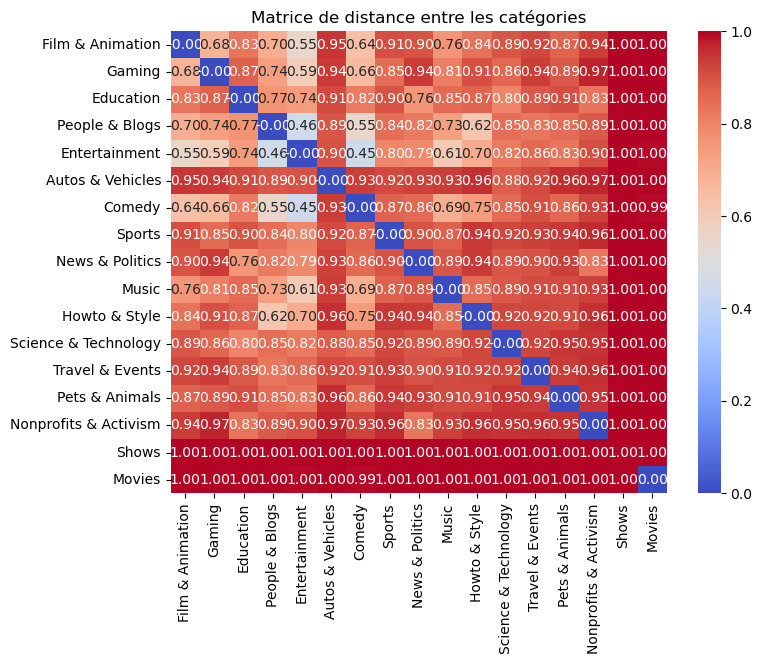

In [52]:
# Visualiser la matrice de distance
plt.figure(figsize=(8, 6))
sns.heatmap(distance_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de distance entre les catégories")
plt.show()

Now that we have distances between themes, we can use algorithms to find clusters. We will use hierarchical clustering.

So now we can simply choose the level of clustering we wish, so the content creator will just have to pick one of the themes in the same cluster. 

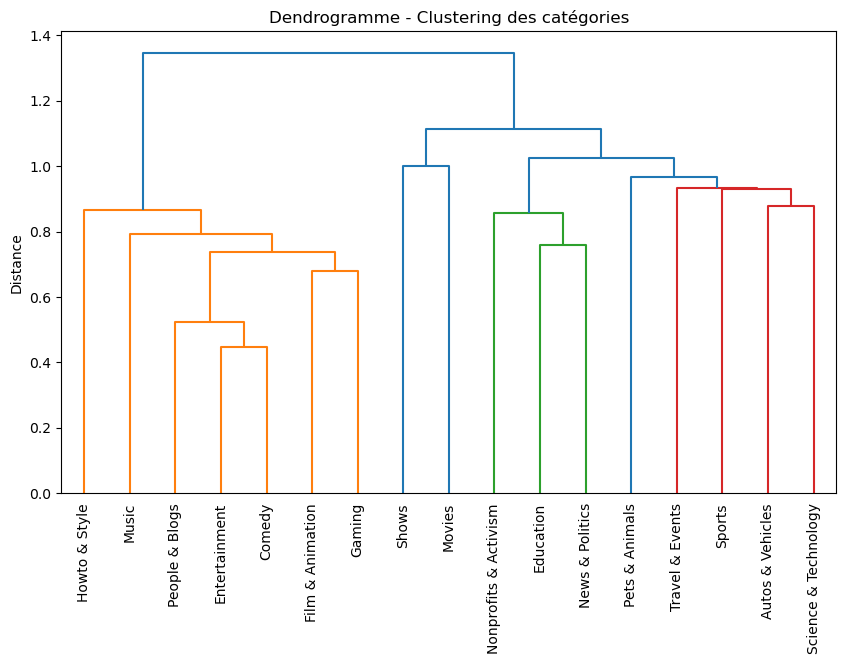

In [57]:
# Convertir la matrice de distances en un format compressé (vecteur)
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from scipy.spatial.distance import squareform

for i in range(len(distance_matrix)) : 
    distance_matrix[i][i] = 0

distance_vector = squareform(distance_matrix)

# Clustering hiérarchique (ex. méthode 'ward' ou 'average')
linkage_matrix = linkage(distance_vector, method='ward')

# Visualisation du dendrogramme
plt.figure(figsize=(10, 6))  # Ajustez la taille pour bien voir les noms
dendrogram(
    linkage_matrix,
    labels=liste_categories,  # Ajouter les noms des catégories
    leaf_rotation=90,  # Rotation des noms pour lisibilité
    leaf_font_size=10  # Taille des noms
)
plt.title("Dendrogramme - Clustering des catégories")
plt.ylabel("Distance")
plt.show()